In [90]:
#import all packages 
import pandas as pd
import warnings
import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder


data = pd.read_csv('../data/kc_house_data.csv')

In [91]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


In [92]:
# drop columns that have no desire to our stakeholder 
clean_null = data.drop(columns=['id','date','long','yr_built','condition','view', 'waterfront',], axis=1)


In [93]:
clean_null.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,83.636778,98077.951845,47.560093,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,399.946414,53.513072,0.138552,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,98001.000000,47.155900,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,0.000000,98033.000000,47.471100,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,98065.000000,47.571800,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,0.000000,98118.000000,47.678000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,98199.000000,47.777600,6210.000000,871200.000000


In [94]:
# locating outliers in bedroom 
clean_null = clean_null.loc[clean_null['bedrooms'] < 8] # TODO add comments justifying these
clean_null = clean_null.loc[clean_null['bathrooms'] < 6] 
clean_null = clean_null.loc[clean_null['sqft_living'] < 6000 ]
clean_null = clean_null.loc[clean_null['price'] < 1500000 ]
clean_null = clean_null.loc[clean_null['bedrooms'] > .99]
clean_null = clean_null.loc[clean_null['bathrooms'] > .99]
clean_null = clean_null.loc[clean_null['sqft_living'] > 600 ]
clean_null = clean_null.loc[clean_null['price'] > 100000 ]
clean_null = clean_null.loc[clean_null['sqft_lot'] < 100000 ]
clean_null = clean_null.loc[clean_null['floors'] < 2.1 ]



In [95]:
clean_null = clean_null.loc[clean_null['sqft_basement'] != '?' ] 

In [96]:
clean_null['sqft_basement'] = clean_null['sqft_basement'].astype(float)

In [97]:
clean_null['true_sqft'] = clean_null['sqft_living']  - clean_null['sqft_basement']


In [98]:
# creating a new feature of price per sqft
clean_null['price_per_sqft'] = clean_null['price']  / clean_null['true_sqft']


In [99]:
test = [i[0:2].strip() for i in clean_null['grade']]


In [100]:
clean_null['grade_ordinal'] = [int(i[0:2].strip()) for i in clean_null['grade']]

In [101]:
zip_home_size = clean_null.loc[clean_null['zipcode'].isin([98052,98102,98103,98105,98109,98119,98121,98134,98164])]



In [102]:
curated_zip = np.array([98052,98102,98103,98105,98109,98119,98121,98134,98164])

In [103]:

# TODO add these OHE'd columns to main data by assigning <dfname>['zipcodes_ohe']
#
# take out the isin function for all zipcodes, if that makes the OLS work. could also narrow down to curated after the OHE on all zipcodes
zips = clean_null.loc[clean_null['zipcode'].isin(curated_zip)].dropna() 
ohe = OneHotEncoder(sparse=False, drop=[98109]) # the zip code with the highest prices in Seattle. could do 98052, near the Microsoft campus as well
ohe.fit(zips['zipcode'].to_numpy().reshape(-1, 1))
zips_encoded = ohe.transform(zips['zipcode'].to_numpy().reshape(-1, 1))

zipcodes_ohe = pd.DataFrame(zips_encoded, columns=ohe.get_feature_names(), index=zips.index)

In [104]:
zip_home_size.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode',
       'lat', 'sqft_living15', 'sqft_lot15', 'true_sqft', 'price_per_sqft',
       'grade_ordinal'],
      dtype='object')

In [105]:
zip_home_size.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15,true_sqft,price_per_sqft,grade_ordinal
price,1.000000,0.385248,0.455574,0.670996,0.118694,0.364769,0.571365,0.255721,0.095900,0.140795,-0.159207,0.484885,0.074767,0.571365,0.255037,0.593548
bedrooms,0.385248,1.000000,0.514230,0.638757,0.198276,0.237561,0.519254,0.287809,0.008931,-0.236354,0.080371,0.351513,0.171785,0.519254,-0.271004,0.283951
bathrooms,0.455574,0.514230,1.000000,0.703345,0.162710,0.484452,0.572887,0.314883,0.059175,-0.277840,0.075483,0.428102,0.162868,0.572887,-0.245165,0.576536
sqft_living,0.670996,0.638757,0.703345,1.000000,0.348899,0.425992,0.856676,0.371825,0.017210,-0.340077,0.170756,0.665886,0.337377,0.856676,-0.339494,0.661585
sqft_lot,0.118694,0.198276,0.162710,0.348899,1.000000,-0.045677,0.381533,-0.018984,-0.056516,-0.490942,0.323792,0.428761,0.872176,0.381533,-0.296214,0.295097
floors,0.364769,0.237561,0.484452,0.425992,-0.045677,1.000000,0.581161,-0.230711,0.033467,-0.064160,0.030006,0.320128,-0.051128,0.581161,-0.344749,0.521006
sqft_above,0.571365,0.519254,0.572887,0.856676,0.381533,0.581161,1.000000,-0.160336,-0.026687,-0.434793,0.261542,0.700724,0.378478,1.000000,-0.578028,0.700378
sqft_basement,0.255721,0.287809,0.314883,0.371825,-0.018984,-0.230711,-0.160336,1.000000,0.080943,0.131709,-0.143923,0.013156,-0.035533,-0.160336,0.390580,0.005550
yr_renovated,0.095900,0.008931,0.059175,0.017210,-0.056516,0.033467,-0.026687,0.080943,1.000000,0.125922,-0.052073,-0.061129,-0.053216,-0.026687,0.114789,0.006131
zipcode,0.140795,-0.236354,-0.277840,-0.340077,-0.490942,-0.064160,-0.434793,0.131709,0.125922,1.000000,-0.424472,-0.473659,-0.537077,-0.434793,0.617137,-0.312440


In [106]:
zip_new_columns = zip_home_size.drop(columns=['zipcode','grade','price_per_sqft','sqft_lot15','sqft_lot'], axis=1)
# zip_new_columns.reset_index(inplace=True, drop=True)
# zip_new_columns['price'].min()

In [123]:
X = zip_new_columns # .drop(['price'], axis=1)
mms = MinMaxScaler().fit(X) # experimental alternate scaler, use standard on the real one
znc_scaled = pd.DataFrame(mms.transform(X), columns=X.columns).dropna() # adding standard scalar to only zip_new_columns, abbreviated as znc

In [108]:
# concatenating two dataframes, znc_scaled and the one hot encoded zipcodes zipcodes_ohe 
zip_ohe_columns = pd.merge(znc_scaled , zipcodes_ohe, how='outer', left_index=True, right_on=znc_scaled.index) #pd.concat([znc_scaled , zipcodes_ohe], axis=1) 
zip_ohe_columns = zip_ohe_columns.drop('key_0', axis=1)
zip_ohe_columns['price'].min()

0.0

In [109]:
# zip_ohe_columns = zip_ohe_columns.dropna() # don't need to do this because NaNs were dropped above

In [110]:
#zip_ohe_columns = zip_ohe_columns.drop(columns=['x0_98102',
      # 'x0_98103', 'x0_98105', 'x0_98119'], axis=1)
#zip_new_columns.reset_index(inplace=True, drop=True)

In [111]:
zip_ohe_columns.corr()

,price,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15,true_sqft,grade_ordinal,x0_98052,x0_98102,x0_98103,x0_98105,x0_98119
price,1.000000,0.378722,0.469247,0.685325,0.357067,0.585763,0.264767,0.095900,-0.163165,0.493543,0.585763,0.606296,-0.108082,0.049672,-0.170690,0.160865,0.137143
bedrooms,0.378722,1.000000,0.493623,0.624528,0.222276,0.499243,0.303293,0.008931,0.072792,0.350736,0.499243,0.285390,0.235234,-0.073790,-0.187997,0.050949,-0.059823
bathrooms,0.469247,0.493623,1.000000,0.702778,0.480868,0.570925,0.324909,0.059175,0.068087,0.440105,0.570925,0.588613,0.296438,-0.015984,-0.286733,0.001076,-0.004338
sqft_living,0.685325,0.624528,0.702778,1.000000,0.422347,0.857207,0.381879,0.017210,0.154860,0.668948,0.857207,0.672554,0.336784,-0.056268,-0.265538,0.000490,-0.066366
floors,0.357067,0.222276,0.480868,0.422347,1.000000,0.579547,-0.229072,0.033467,0.032070,0.322013,0.579547,0.509747,0.076916,0.122495,-0.155047,-0.018160,0.056387
sqft_above,0.585763,0.499243,0.570925,0.857207,0.579547,1.000000,-0.148595,-0.026687,0.248689,0.702282,1.000000,0.711124,0.436367,-0.071893,-0.280780,-0.060028,-0.108705
sqft_basement,0.264767,0.303293,0.324909,0.381879,-0.229072,-0.148595,1.000000,0.080943,-0.148941,0.024202,-0.148595,0.015260,-0.136416,0.020974,-0.006000,0.108672,0.067650
yr_renovated,0.095900,0.008931,0.059175,0.017210,0.033467,-0.026687,0.080943,1.000000,-0.052073,-0.061129,-0.026687,0.006131,-0.117832,-0.029869,0.049510,0.022627,0.080630
lat,-0.163165,0.072792,0.068087,0.154860,0.032070,0.248689,-0.148941,-0.052073,1.000000,0.176397,0.248689,0.073714,0.373242,-0.281237,0.177791,-0.048985,-0.360898
sqft_living15,0.493543,0.350736,0.440105,0.668948,0.322013,0.702282,0.024202,-0.061129,0.176397,1.000000,0.702282,0.643093,0.497986,-0.026765,-0.422183,-0.028636,-0.078747


In [112]:
zip_ohe_columns.columns


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above',
       'sqft_basement', 'yr_renovated', 'lat', 'sqft_living15', 'true_sqft',
       'grade_ordinal', 'x0_98052', 'x0_98102', 'x0_98103', 'x0_98105',
       'x0_98119'],
      dtype='object')

In [113]:

y = zip_ohe_columns['price']
x = zip_ohe_columns['sqft_living']
X_c = sm.add_constant(x)


simple_model = sm.OLS(y, X_c)


simple_model_results = simple_model.fit()
print(simple_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     1040.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):          6.90e-164
Time:                        14:15:41   Log-Likelihood:                 728.68
No. Observations:                1176   AIC:                            -1453.
Df Residuals:                    1174   BIC:                            -1443.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1341      0.008     16.901      

In [114]:
#reviewing coef and p value significants 
y = zip_ohe_columns['price']
X = zip_ohe_columns.drop(['price'], axis=1)

y = y.dropna()
X = X.dropna()

# len(y), len(X)
ols_kch = sm.OLS(y, sm.add_constant(X)).fit()
ols_kch.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     203.9
Date:                Thu, 27 Oct 2022   Prob (F-statistic):          9.74e-301
Time:                        14:15:41   Log-Likelihood:                 1085.4
No. Observations:                1176   AIC:                            -2141.
Df Residuals:                    1161   BIC:                            -2065.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1538      0.022      7.093      0.000       0.111       0.196
bedrooms          0.0166      0.024      0.687      0.492      -0.031       0.064
bathrooms        -0.0083      0.022     -0.381      0.703      -0.051       0.034
sqft_living       0.2301      0.013     17.546      0.000       0.204       0.256
floors           -0.0353      0.009     -3.805      0.000      -0.053      -0.017
sqft_above        0.1963      0.012     15.908      0.000       0.172       0.221
sqft_basement     0.0980      0.016      6.184      0.000       0.067       0.129
yr_renovated      0.0350      0.013      2.661      0.008       0.009       0.061
lat              -0.1797      0.029     -6.268      0.000      -0.236      -0.123
sqft_living15     0.1832      0.028      6.550      0.000       0.128       0.238
true_sqft         0.1963      0.012     15.908      0.000       0.172       0.221
grade_ordinal     0.3581      0.033     10.869      0.000       0.293       0.423
x0_98052         -0.1720      0.015    -11.824      0.000      -0.201      -0.143
x0_98102         -0.0175      0.018     -0.970      0.332      -0.053       0.018
x0_98103         -0.0210      0.014     -1.473      0.141      -0.049       0.007
x0_98105          0.0084      0.015      0.576      0.565      -0.020       0.037
x0_98119          0.0115      0.015      0.785      0.433      -0.017       0.040
==============================================================================
Omnibus:                      141.795   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              522.704
Skew:                           0.543   Prob(JB):                    3.13e-114
Kurtosis:                       6.080   Cond. No.                     3.21e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.31e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [115]:
#identifying the lots we recommend the stakeholder purchase and build new multifamily homes. 

zip_lot_size = clean_null.loc[(clean_null['zipcode'].isin([98052,98102,98103,98105,98109,98119,98121,98134,98164]))
                              & (clean_null['sqft_lot'] >= 40000)]

zip_lot_size

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15,true_sqft,price_per_sqft,grade_ordinal
340,485000.0,4,1.75,2560,43995,2.0,7 Average,2560,0.0,0.0,98052,47.6945,2560,14764,2560.0,189.453125,7
2580,965000.0,4,2.50,4070,57587,2.0,10 Very Good,4070,0.0,0.0,98052,47.6908,3890,35960,4070.0,237.100737,10
2956,900000.0,4,2.50,3620,42580,2.0,10 Very Good,3620,0.0,0.0,98052,47.7204,2950,33167,3620.0,248.618785,10
3671,620000.0,3,2.25,2190,45738,1.0,8 Good,2190,0.0,0.0,98052,47.7108,2970,4496,2190.0,283.105023,8
3716,735000.0,6,2.75,3360,84506,1.0,7 Average,2040,1320.0,0.0,98052,47.7150,2190,43124,2040.0,360.294118,7
4470,1050000.0,3,4.00,4380,42769,2.0,11 Excellent,4380,0.0,0.0,98052,47.7167,3630,35425,4380.0,239.726027,11
5302,1120000.0,4,3.25,4750,62365,2.0,11 Excellent,4750,0.0,0.0,98052,47.7149,3300,31866,4750.0,235.789474,11
6024,822000.0,4,2.50,2683,40386,2.0,9 Better,2683,0.0,0.0,98052,47.6982,2683,34800,2683.0,306.373463,9
6578,550000.0,3,2.25,1980,40887,1.0,8 Good,1980,0.0,NaN,98052,47.6478,2460,35700,1980.0,277.777778,8
9829,830000.0,4,2.50,1850,50662,1.0,8 Good,1430,420.0,0.0,98052,47.6535,2090,10599,1430.0,580.419580,8


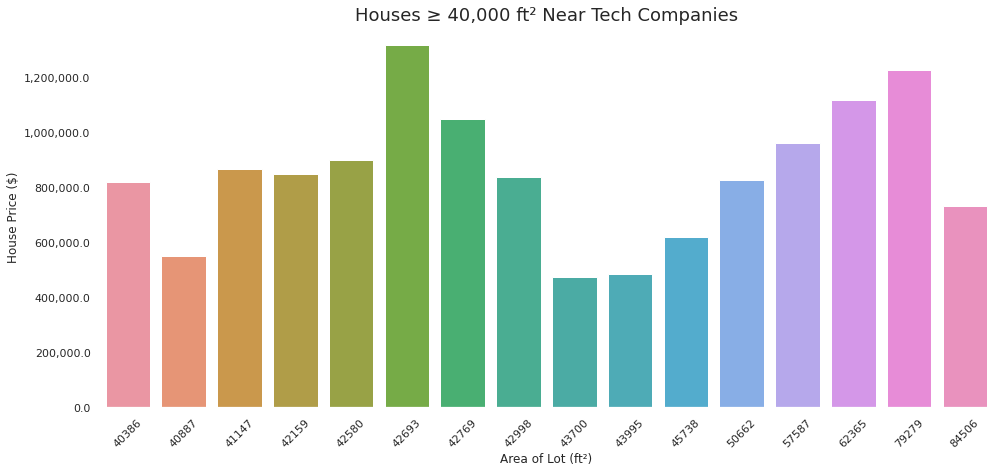

In [116]:

fig, ax = plt.subplots(figsize=(16,7))

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.barplot(data=zip_lot_size, x='sqft_lot', y='price');

# plt.bar(data=zip_lot_size, x='sqft_living', height='price')
plt.title('Houses ≥ 40,000 ft² Near Tech Companies', fontsize=18)
plt.xlabel('Area of Lot (ft²)')
plt.ylabel('House Price ($)')
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
# plt.yticks(labels=((zip_lot_size['price'])/100))
# plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()


x 1 scaled and not scaled (x)
b4 1hot and after 

In [117]:
zip_ohe_columns.shape

(1176, 17)

In [118]:
#Linearity
# X = zip_ohe_columns.drop(['price'], axis=1)
# ss = StandardScaler().fit(X)

# X_scaled = ss.transform(X)

In [119]:
X_c = sm.add_constant(zip_ohe_columns.drop(['price'], axis=1))
y = zip_ohe_columns['price']

In [120]:
model = sm.OLS(endog=y, exog=X_c).fit()
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     203.9
Date:                Thu, 27 Oct 2022   Prob (F-statistic):          9.74e-301
Time:                        14:15:42   Log-Likelihood:                 1085.4
No. Observations:                1176   AIC:                            -2141.
Df Residuals:                    1161   BIC:                            -2065.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1538      0.022      7.093      0.000       0.111       0.196
bedrooms          0.0166      0.024      0.687      0.492      -0.031       0.064
bathrooms        -0.0083      0.022     -0.381      0.703      -0.051       0.034
sqft_living       0.2301      0.013     17.546      0.000       0.204       0.256
floors           -0.0353      0.009     -3.805      0.000      -0.053      -0.017
sqft_above        0.1963      0.012     15.908      0.000       0.172       0.221
sqft_basement     0.0980      0.016      6.184      0.000       0.067       0.129
yr_renovated      0.0350      0.013      2.661      0.008       0.009       0.061
lat              -0.1797      0.029     -6.268      0.000      -0.236      -0.123
sqft_living15     0.1832      0.028      6.550      0.000       0.128       0.238
true_sqft         0.1963      0.012     15.908      0.000       0.172       0.221
grade_ordinal     0.3581      0.033     10.869      0.000       0.293       0.423
x0_98052         -0.1720      0.015    -11.824      0.000      -0.201      -0.143
x0_98102         -0.0175      0.018     -0.970      0.332      -0.053       0.018
x0_98103         -0.0210      0.014     -1.473      0.141      -0.049       0.007
x0_98105          0.0084      0.015      0.576      0.565      -0.020       0.037
x0_98119          0.0115      0.015      0.785      0.433      -0.017       0.040
==============================================================================
Omnibus:                      141.795   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              522.704
Skew:                           0.543   Prob(JB):                    3.13e-114
Kurtosis:                       6.080   Cond. No.                     3.21e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.31e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [121]:
min(y)

0.0

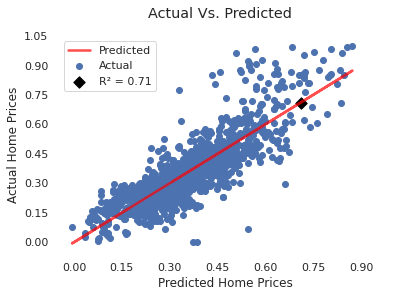

In [125]:
# this whole plot is on the wrong params, price isn't dropped from one of the scaler lines, don't use

model_preds = model.predict(X_c)
# resids = y - model_preds

fig, ax = plt.subplots()

# mention (during presentation) which features went into model

ax.scatter(model_preds, y)
b, a = np.polyfit(model_preds, y, deg=1)
ax.plot(model_preds, a + b * model_preds, color="red", lw=2.5, alpha=0.7) # Plot regression line
R2 = ax.scatter([0.711],[0.711], color='black', marker='D', s=65 )
ax.legend(('Predicted', 'Actual', 'R² = 0.71'), loc="upper left") # 71% of the variance is explained by our model
ax.set_xlabel('Predicted Home Prices')
ax.set_ylabel('Actual Home Prices')

ax.set_yticks(model_preds) # 
ax.set_xticks(y)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.yaxis.set_major_locator(plt.MaxNLocator(10))

plt.suptitle('Actual Vs. Predicted')
plt.show();

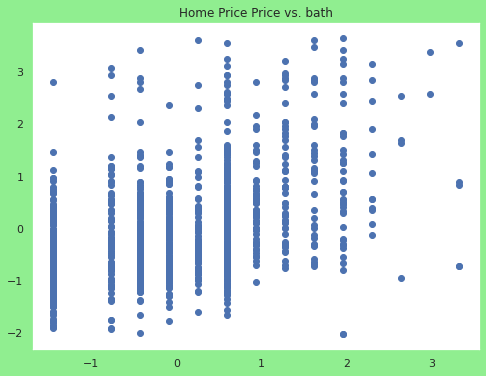

In [33]:
fig, ax = plt.subplots(ncols=1, figsize=(8, 6))


ax.scatter(X['bathrooms'], y)
ax.set_title('Home Price Price vs. bath');

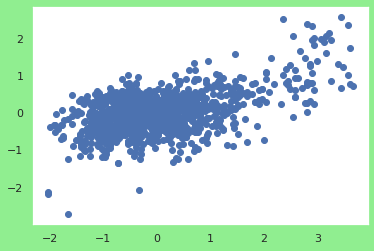

In [34]:
fig, ax = plt.subplots()

ax.scatter(y, resids);

In [35]:
dw = sm.stats.stattools.durbin_watson

In [36]:
dw(resids)

1.9944479998668865

In [37]:
model.summary().tables[2]

Omnibus:,141.795,Durbin-Watson:,1.994
Prob(Omnibus):,0.000,Jarque-Bera (JB):,522.704
Skew:,0.543,Prob(JB):,3.13e-114
Kurtosis:,6.080,Cond. No.,6.21e+16


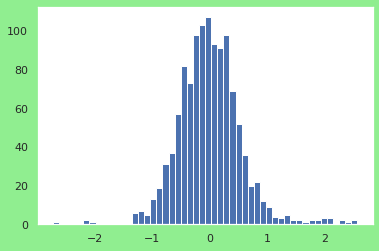

In [38]:
resids.hist(bins=50);

In [ ]:
sm.qqplot(resids, line='r');

In [ ]:
zip_ohe_columns.info()

In [ ]:
zip_ohe_columns['grade_ordinal'].unique()

In [ ]:
fig, ax = plt.subplots()

ax.scatter(y=zip_ohe_columns['price'], x=zip_ohe_columns.drop(['price'], axis=1));

In [ ]:
model.summary().tables[2]

In [ ]:
y.hist();

In [ ]:
fig, ax = plt.subplots()

ax.scatter(y, resids);

In [ ]:
y_log = np.log(y)
y_log.hist();

In [ ]:
# 'x1' is 
sm.graphics.plot_regress_exog(model, 'x1', fig=plt.figure(figsize=(12, 8)));